<a href="https://colab.research.google.com/github/MashaKubyshina/Learning_to_code/blob/master/Regression_on_States_Basics_of_Statistics_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# State dataset


**Goal:** find the best predictor for poverty

Process:
1. Import the libraries and the data
2. Look at the data
3. Plot the data
4. Run linear regression
5. Scaler min-max
6. Use Forward and Backward selection
7. RidgeCV regression
8. LassoCV regression
9. A few more plots


**Conclusion:** insights and next steps


In [2]:
# We do this to install scikit-learn 0.24 version
# It is a hack for those using colab

!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 22.3MB 26.6MB/s 


In [3]:
# Check sklearn version

import sklearn

sklearn.__version__

'0.24.2'

In [5]:
# Import necessary libraries to start

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.linear_model as linear_module
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [6]:
url = 'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv'

df = pd.read_csv(url,  sep=',')
df

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6
5,Colorado,84.5,90.2,88.7,9.4,9.6
6,Connecticut,87.7,85.4,87.5,7.8,12.1
7,Delaware,80.1,76.3,88.7,8.1,13.1
8,District of Columbia,100.0,36.2,86.0,16.8,18.9
9,Florida,89.3,80.6,84.7,12.1,12.0


In [7]:
df.shape

(51, 6)

In [8]:
df.columns

Index(['state', 'metro_res', 'white', 'hs_grad', 'poverty', 'female_house'], dtype='object')

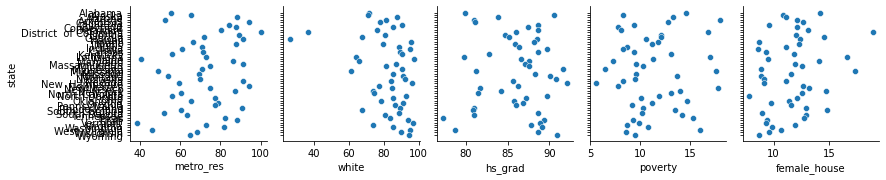

In [9]:
# Before we decide what perdictor to use, we want to check pairplot to see if we find any visual guidance


import seaborn as sns

sns.pairplot(df, y_vars="state", x_vars=['metro_res', 'white', 'hs_grad', 'poverty', 'female_house'])

In [26]:
# Regression results summary for all variables

import statsmodels.formula.api as smf
m1 = smf.ols('poverty ~ hs_grad+metro_res+white+female_house', 
             data=df)
fitted = m1.fit()
print(fitted.summary())

# p < 0,05 means that there is statistical significance

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Sun, 30 May 2021   Prob (F-statistic):           8.88e-10
Time:                        23:00:20   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280   

In [25]:
# Regression results summary for hs_grad, metro_res, white variables (we took away female_house)

import statsmodels.formula.api as smf
m2 = smf.ols('poverty ~ hs_grad+metro_res+white', 
             data=df)
fitted = m2.fit()
print(fitted.summary())

# p < 0,05 means that there is statistical significance
# once we took female_house out of the model the adjusted R-squared improved

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     28.00
Date:                Sun, 30 May 2021   Prob (F-statistic):           1.55e-10
Time:                        23:00:16   Log-Likelihood:                -103.41
No. Observations:                  51   AIC:                             214.8
Df Residuals:                      47   BIC:                             222.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.7220      6.389     10.756      0.0

In [11]:
# First we will test linear regression using one variable
# In this analysis I will use hs_grad as the perdictor
# Worth noting that I am using 75% of data for training and 25% for testing in this colab

Y = df[['poverty']]
X = df[['hs_grad']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

# training error
y_train_predict = reg.predict(X_train)
regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))
r2_score_tr=r2_score(y_train, y_train_predict)
print("Training error: ", r2_score_tr)

# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))
r2_score_ts=r2_score(y_test, y_predict)
print("Test error:", r2_score_ts)

# Based on r2_score 49% of variability can be explained by the model

intercept [65.66392245]
slope [[-0.63353192]]
Training error:  0.5727012009678737
Test error: 0.49798874751389655


In [12]:
# In this analysis I will use white as the perdictor

Y = df[['poverty']]
X = df[['white']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

# training error
y_train_predict = reg.predict(X_train)
regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))
r2_score_tr=r2_score(y_train, y_train_predict)
print("Training error: ", r2_score_tr)

# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))
r2_score_ts=r2_score(y_test, y_predict)
print("Test error:", r2_score_ts)

# Based on r2_score 11% of variability can be explained by the model

intercept [16.04367223]
slope [[-0.05718019]]
Training error:  0.08017696386942053
Test error: 0.11399744761631148


In [13]:
# In this analysis I will use female_house as the perdictor

Y = df[['poverty']]
X = df[['female_house']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

# training error
y_train_predict = reg.predict(X_train)
regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))
r2_score_tr=r2_score(y_train, y_train_predict)
print("Training error: ", r2_score_tr)

# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))
r2_score_ts=r2_score(y_test, y_predict)
print("Test error:", r2_score_ts)

# Based on r2_score 18% of variability can be explained by the model

intercept [3.15032837]
slope [[0.69650744]]
Training error:  0.3058554718696975
Test error: 0.18118640381892048


In [14]:
# In this analysis I will use metro_res as the perdictor

Y = df[['poverty']]
X = df[['metro_res']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

# training error
y_train_predict = reg.predict(X_train)
regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))
r2_score_tr=r2_score(y_train, y_train_predict)
print("Training error: ", r2_score_tr)

# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))
r2_score_ts=r2_score(y_test, y_predict)
print("Test error:", r2_score_ts)

# Based on r2_score 3% of variability can be explained by the model

intercept [14.13689334]
slope [[-0.03718506]]
Training error:  0.036406298865671816
Test error: 0.03790955116555472


In [15]:
# Using 2 predictors: 'white', 'hs_grad'

Y = df[['poverty']]
X = df[['white', 'hs_grad']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

# training error
y_train_predict = reg.predict(X_train)
regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))
r2_score_tr=r2_score(y_train, y_train_predict)
print("Training error: ", r2_score_tr)

# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))
r2_score_ts=r2_score(y_test, y_predict)
print("Test error:", r2_score_ts)

# Agian, based on r2_score, only 44% of variability can be explained by the model
# Using 2 predictors doesn't improve the results (actually the result is slightly worse)

intercept [67.23806856]
slope [[-0.04006851 -0.61435205]]
Training error:  0.6115462488918346
Test error: 0.44176482187782695


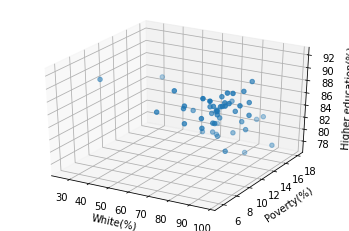

In [16]:
# we can plot a 3D plot showing this data

data_slice = df[['white', 'hs_grad', 'poverty']]
data_slice.head()
white, hs_grad, poverty = [column for column in data_slice.values.T]

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=white, ys=poverty, zs=hs_grad)

ax.set_xlabel('White(%)')
ax.set_ylabel('Poverty(%)')
ax.set_zlabel('Higher education(%)')

plt.show()

In [17]:
# Using all predictors

Y = df[['poverty']]
X = df[['metro_res', 'white', 'hs_grad', 'female_house']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

# training error
y_train_predict = reg.predict(X_train)
regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))
r2_score_tr=r2_score(y_train, y_train_predict)
print("Training error: ", r2_score_tr)

# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))
r2_score_ts=r2_score(y_test, y_predict)
print("Test error:", r2_score_ts)

# Agian, based on r2_score, only 48% of variability can be explained by the model
# Using 4 predictors doesn't improve the results (actually the result is slightly worse)

intercept [65.60511731]
slope [[-0.05641241 -0.0492473  -0.5563571   0.12373212]]
Training error:  0.6815553318250999
Test error: 0.48719779124124096


In [23]:
# Using 3 predictors (we took 'female_house' out)

Y = df[['poverty']]
X = df[['metro_res', 'white', 'hs_grad']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

# training error
y_train_predict = reg.predict(X_train)
regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))
r2_score_tr=r2_score(y_train, y_train_predict)
print("Training error: ", r2_score_tr)

# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))
r2_score_ts=r2_score(y_test, y_predict)
print("Test error:", r2_score_ts)

# Agian, based on r2_score, only 49% of variability can be explained by the model
# Using 3 predictors is better than using 4 predictors
# We will see why this happens in the plots below

intercept [71.36368304]
slope [[-0.05486046 -0.06190894 -0.5958485 ]]
Training error:  0.6791551387446575
Test error: 0.4944390810444189


Text(0.5, 0, 'poverty')

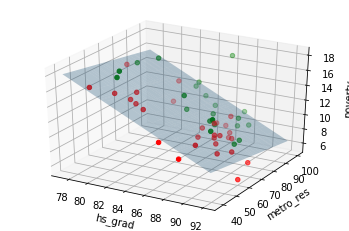

In [18]:
# plotting in 3D metro_res and hs_grad

df.head()

lm = smf.ols(formula='poverty ~ metro_res + hs_grad', data=df).fit()

lm.params

def f(x, y):
    return lm.params.Intercept + lm.params.hs_grad * x  + lm.params.metro_res * y

x = df.hs_grad.sort_values()
y = df.metro_res.sort_values()

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3)
data_below_serf = df[df['poverty'] < f(df['hs_grad'], df['metro_res'])]
data_above_serf = df[df['poverty'] >= f(df['hs_grad'], df['metro_res'])]
ax.scatter(data_below_serf.hs_grad, data_below_serf.metro_res, data_below_serf.poverty, c='r', marker='o')
ax.scatter(data_above_serf.hs_grad, data_above_serf.metro_res, data_above_serf.poverty, c='g', marker='o')
ax.set_xlabel('hs_grad')
ax.set_ylabel('metro_res')
ax.set_zlabel('poverty')

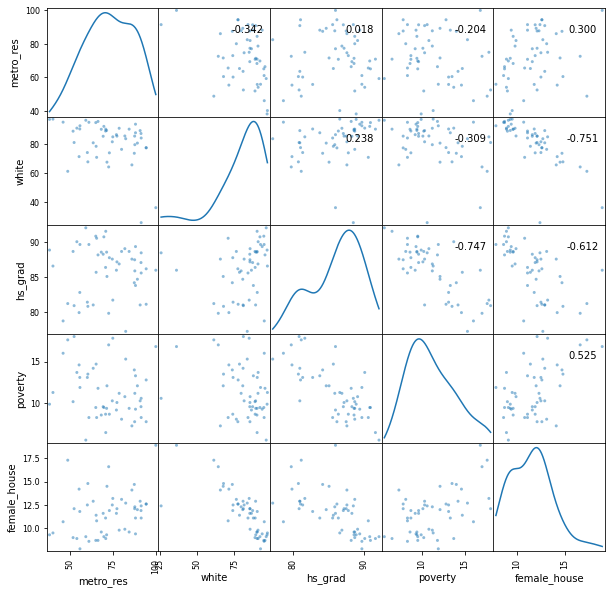

In [19]:
# plot that shows also the correlations between each set of variables
# bottom left part has the plot, top right part shows the correlations

axes = pd.plotting.scatter_matrix(df, figsize=(10,10), diagonal='kde', grid=True)
corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

# what we want to learn here is to see if there are variables that have high correlations with other variables
# when there are variables that are very similar (temp and atemp for example) including the both makes the model weaker

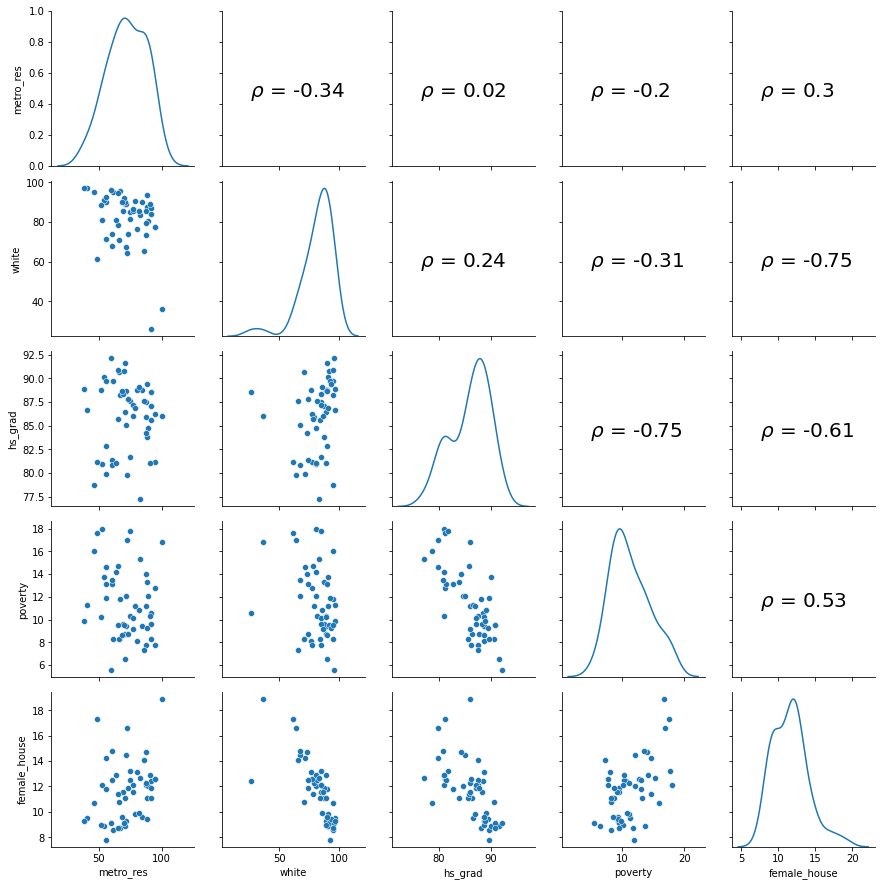

In [22]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.45), size = 20, xycoords = ax.transAxes)

g = sns.PairGrid(df, diag_sharey=False)
# g.map_upper(sns.scatterplot)
g.map_upper(corr)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

# we can see high corrlatiion between 'female_house' and other columns
# this high correlation with other predictors makes the model worse
# this is why we get better score if we take this predictor out of the model

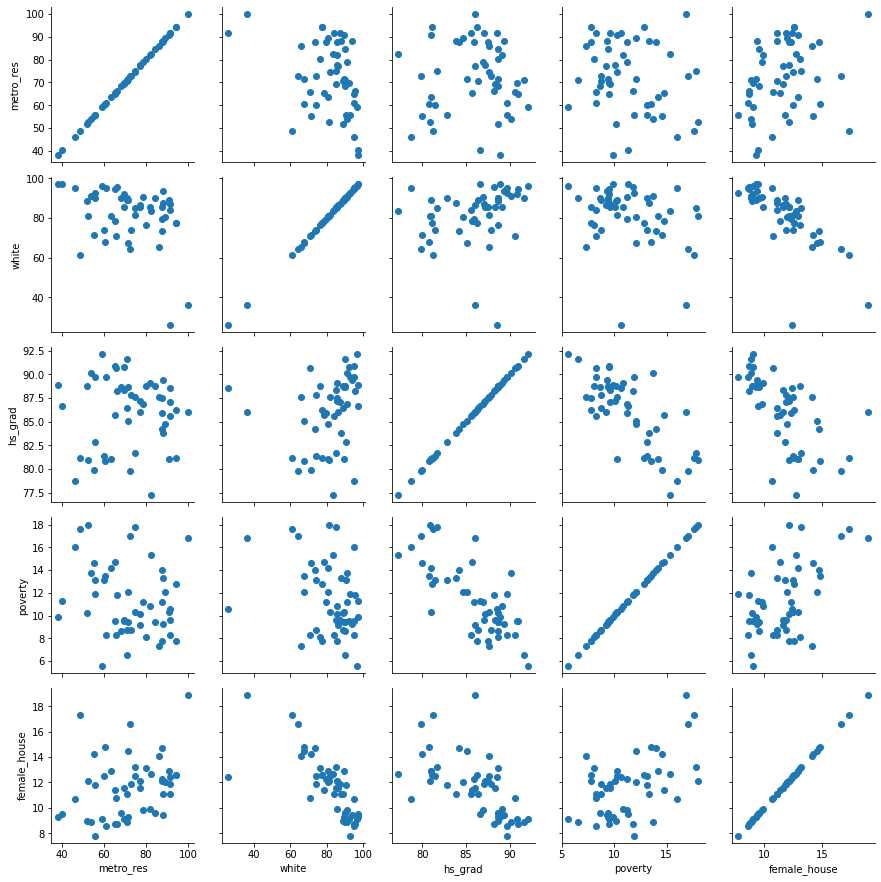

In [21]:
# grid plot with seaborn

grid = sns.PairGrid(df)
grid.map(plt.scatter)

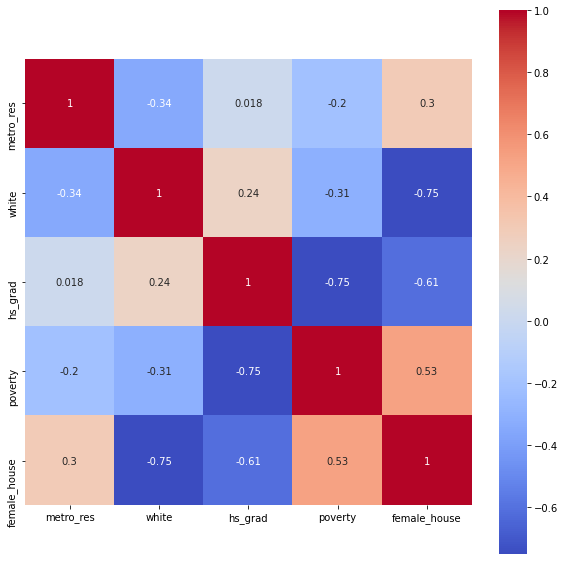

In [20]:
# We can create a heatmap to see how each variable correlates with others

features = df.columns
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[features].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()
plt.close()

In [13]:
# Standardizing 'poverty', 'female_house'
# Ideally we would like to standardize values that are far apart on the numeric scale

Y = df[['hs_grad']]
X = df[['poverty', 'female_house']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [97.90145894]
slope [[-0.77782931 -0.2872795 ]]


In [14]:
scaler = preprocessing.StandardScaler().fit(X)

scaler

StandardScaler()

In [15]:
print(scaler.mean_, scaler.scale_)

[11.34901961 11.63333333] [3.06865063 2.33294114]


In [16]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled[0:5]

array([[-0.37443807, -1.12876115],
       [-0.34185045,  0.5429484 ],
       [-0.56996375,  0.11430493],
       [ 0.70095317,  1.35737101],
       [-0.7003142 , -0.01428812]])

In [17]:
X_train[0:5]

,poverty,female_house
41,10.2,9.0
39,10.3,12.9
21,9.6,11.9
40,13.5,14.8
38,9.2,11.6


In [18]:
# training

model = linear_module.LinearRegression()
reg = model.fit(X_train_scaled, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [85.73184068]
slope [[-2.3868864  -0.67020616]]


In [19]:
# test error

X_test_scaled = scaler.transform(X_test)


y_predict = reg.predict(X_test_scaled)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.5671141214888554

In [20]:
# min-max scaler

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax[0:5]

array([[0.32743363, 0.10810811],
       [0.33628319, 0.45945946],
       [0.27433628, 0.36936937],
       [0.61946903, 0.63063063],
       [0.23893805, 0.34234234]])

In [21]:
X_train[0:5]

,poverty,female_house
41,10.2,9.0
39,10.3,12.9
21,9.6,11.9
40,13.5,14.8
38,9.2,11.6


In [22]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.24.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, threadpoolctl, numpy, joblib
Required-by: yellowbrick, sklearn, sklearn-pandas, mlxtend, lightgbm, librosa, imbalanced-learn


In [23]:
sklearn.show_versions()


System:
    python: 3.7.10 (default, May  3 2021, 02:48:31)  [GCC 7.5.0]
executable: /usr/bin/python3
   machine: Linux-5.4.109+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
          pip: 19.3.1
   setuptools: 56.1.0
      sklearn: 0.24.2
        numpy: 1.19.5
        scipy: 1.4.1
       Cython: 0.29.23
       pandas: 1.1.5
   matplotlib: 3.2.2
       joblib: 1.0.1
threadpoolctl: 2.1.0

Built with OpenMP: True


In [24]:
# We will use min_max_scaler

Y = df[['poverty']]
X_unscaled = df[['metro_res', 'white', 'hs_grad', 'female_house']]

X = min_max_scaler.fit_transform(X_unscaled)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [26]:
# Forward and backward selection using regression model

from sklearn.feature_selection import SequentialFeatureSelector
from time import time
from sklearn.linear_model import Lasso

model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)

# this feature is optional: n_features_to_select=3, we are telling how many features to select

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(reg, n_features_to_select=3,
                                        direction='forward').fit(X_train, y_train)
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(reg,
                                       direction='backward').fit(X_train, y_train)
toc_bwd = time()

sfs_forward.get_support()
toc_fwd = time()
print(toc_fwd)
print(tic_bwd)

1622331606.3376265
1622331606.2923687


In [27]:
X_unscaled.columns[sfs_forward.get_support()]

Index(['metro_res', 'white', 'hs_grad'], dtype='object')

In [28]:
X_unscaled.columns[sfs_backward.get_support()]

Index(['white', 'hs_grad'], dtype='object')

In [29]:
sfs_forward.get_params()

{'cv': 5,
 'direction': 'forward',
 'estimator': LinearRegression(),
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': False,
 'estimator__positive': False,
 'n_features_to_select': 3,
 'n_jobs': None,
 'scoring': None}

In [30]:
X_train[0:5]

array([[0.22168285, 0.88342697, 0.77181208, 0.10810811],
       [0.85275081, 0.88904494, 0.25503356, 0.45945946],
       [0.86084142, 0.86095506, 0.66442953, 0.36936937],
       [0.36084142, 0.58707865, 0.24161074, 0.63063063],
       [0.62944984, 0.8497191 , 0.59060403, 0.34234234]])

In [31]:
y_predict = sfs_backward.estimator.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

# Using backward selection based on r2_score, 48% of variability can be explained by the model

0.4871977912412424

In [32]:
df.columns

Index(['state', 'metro_res', 'white', 'hs_grad', 'poverty', 'female_house'], dtype='object')

In [33]:
# We will now use ridge model (all predictors)

from sklearn.linear_model import Ridge

Y = df[['poverty']]
X = df[['metro_res', 'white', 'hs_grad', 'female_house']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


regressor = Ridge(alpha=0.5)
regressor.fit(X_train,y_train)
y_predict = regressor.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

r2_score(y_test, y_predict)


# using ridge with all variables we get r2_score: 48% of variability can be explained by the model

0.48737825825943926

In [37]:
# Ridge (without 'white')

from sklearn.linear_model import Ridge

Y = df[['poverty']]
X = df[['metro_res', 'hs_grad', 'female_house']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


regressor = Ridge(alpha=0.5)
regressor.fit(X_train,y_train)
y_predict = regressor.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

r2_score(y_test, y_predict)

# using ridge without 'casual' and 'registered, we get r2_score of 0.48; 48% of variability can be explained by the model

0.48939917186434523

In [38]:
reg.intercept_

array([20.18900044])

In [39]:
reg.coef_

array([[-3.48628668, -3.50640806, -8.28972083,  1.37342651]])

In [40]:
# ridge cross validation

from sklearn.linear_model import RidgeCV

Y = df[['poverty']]
X = df[['metro_res', 'white', 'hs_grad', 'female_house']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


ridge_regressor = RidgeCV(cv=5, alphas = [0.01,0.1, 0.5])
ridge_regressor.fit(X_train,y_train)
y_predict = ridge_regressor.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

r2_score(y_test, y_predict)

# using ridge cross-validation we get r2_score of 0.48; 48% of variability can be explained by the model

0.48737825825943926

In [41]:
ridge_regressor.coef_

array([[-0.05642603, -0.04920944, -0.55562641,  0.1242545 ]])

In [42]:
ridge_regressor.alpha_

0.5

In [43]:
# Lasso cross validation model

from sklearn.linear_model import LassoCV
lasso_regressor = LassoCV(alphas=[0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10, 50, 100, 1000 ])
lasso_regressor.fit(X_train,y_train)
y_predict = lasso_regressor.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

r2_score(y_test, y_predict)

# using lasso cross-validation we get r2_score of 0.51; 51% of variability can be explained by the model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.517331597465721

In [44]:
lasso_regressor.alpha_

0.75

In [45]:
lasso_regressor.coef_

array([-0.05102285, -0.05862933, -0.54099801,  0.        ])

In [46]:
# As the last step I want to check the dataset again and run some plots to visualize the data

df.describe()

,metro_res,white,hs_grad,poverty,female_house
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,72.249020,81.719608,86.011765,11.349020,11.633333
std,15.275894,13.897223,3.725998,3.099185,2.356155
min,38.200000,25.900000,77.200000,5.600000,7.800000
25%,60.800000,76.800000,83.300000,9.250000,9.550000
50%,71.600000,85.400000,86.900000,10.600000,11.800000
75%,86.800000,90.250000,88.700000,13.400000,12.650000
max,100.000000,97.100000,92.100000,18.000000,18.900000


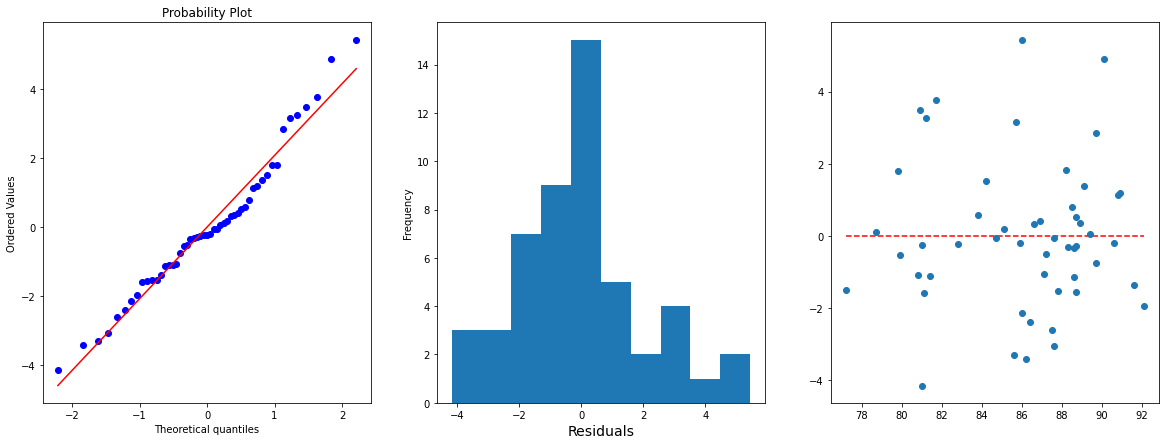

In [58]:
# plotting: QQ-plot, residuals

import scipy
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))
plt.subplot(131)
scipy.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(132)
(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.subplot(133)
plt.plot(df['hs_grad'], fitted.resid, 'o')
plt.hlines(np.mean(fitted.resid), df['hs_grad'].min(), df['hs_grad'].max(), linestyle='--', colors='red')
plt.show()

# We can see that overall the residuals are normal 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


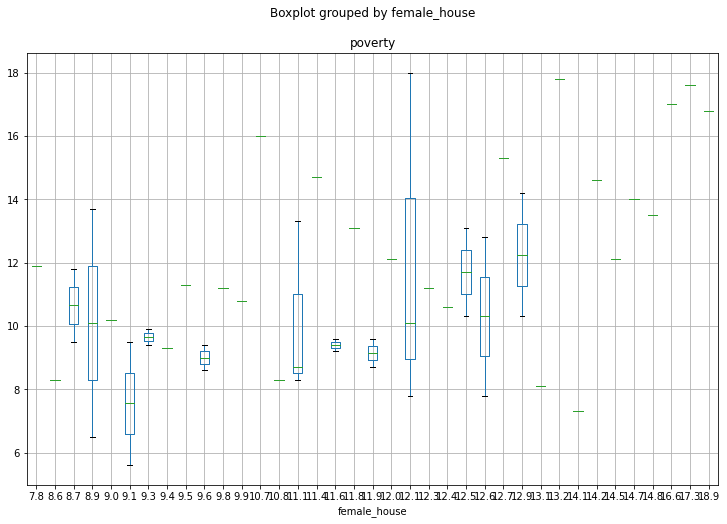

In [48]:
# In this case I am doing exploratory analysis at the very end (to see if the predictors I get make sense)

df.boxplot('poverty', by='female_house', figsize=(12,8), grid=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


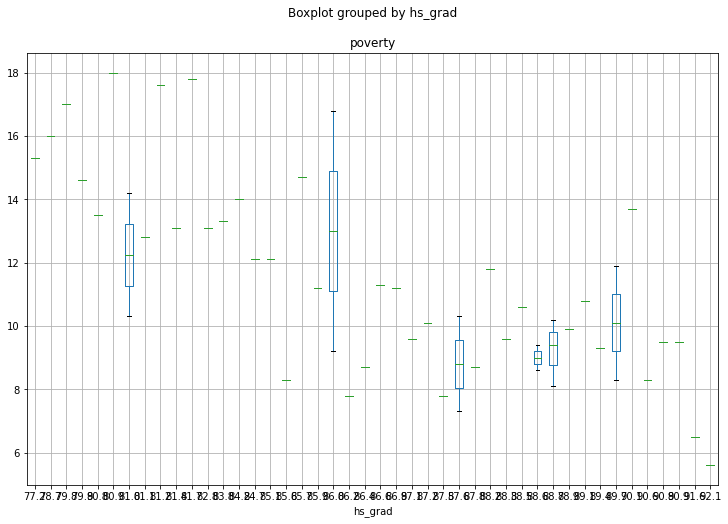

In [49]:
df.boxplot('poverty', by='hs_grad', figsize=(12,8), grid=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


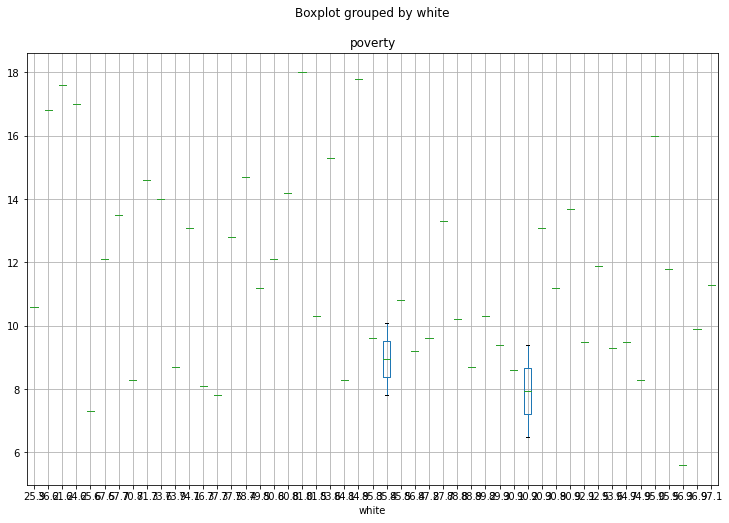

In [50]:
df.boxplot('poverty', by='white', figsize=(12,8), grid=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


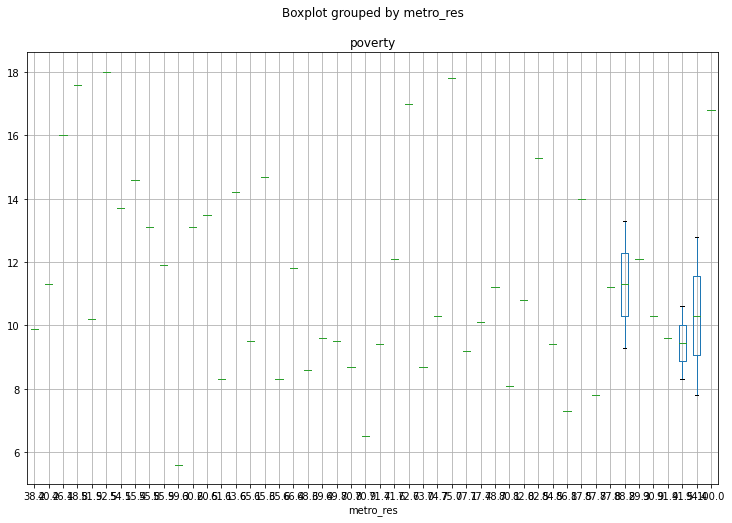

In [51]:
df.boxplot('poverty', by='metro_res', figsize=(12,8), grid=True)

**Conclusion:**
**education** level is the best prediction for **poverty**, best model to use is LassoCV. It gives us r-squared 0.51 which means that using this predictor 51% of the variability can be explained by this model.